# Plot Sparse Basic Info and Demo Examples

### Plot Neff

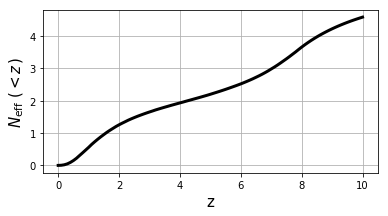

In [1]:
from model_F17 import *
from survey_params import *
sphx_par = spherex_param()

fig, ax = plt.subplots(1,1, figsize = (6,3))

df = pd.read_csv('data_internal/Be13NeffSFRs.txt')
z_dat = df['z'].values
Neff_dat = df['Neff'].values * (sphx_par.dth * 2)**2
dz = z_dat[1] - z_dat[0]
ax.plot(z_dat, np.cumsum(Neff_dat) * dz, 'k', lw = 3)
ax.set_ylabel(r'$N_{\rm eff}\,\,(< z\,)$', fontsize = 15)
ax.set_xlabel('z', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid()

plt.savefig('plots/paperfig/Neff.pdf', bbox_inches = 'tight', dpi = 300)

### basic info

In [2]:
from sparse_tools_F17 import *
from survey_params import *

model = 'Be13'

sphx_par = spherex_param()
dth = sphx_par.dth
nu_binedges = sphx_par.nu_binedges
nu_bins = sphx_par.nu_bins
line_use = ['Ha', 'OIII', 'Hb', 'OII', 'Lya']
line_name_arr = [r'$H\alpha$', r'$[O\, III]$', r'$H\beta$', r'$[O\, II]$', r'$Ly\alpha$']
nu0_arr = [spec_lines.Ha.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OIII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Hb.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.OII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.Lya.to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use
dOm = (dth * u.arcmin.to(u.rad))**2

sigI0 = 3631 * 10**(-22  /2.5) / 5 / dOm / np.sqrt(4) # pixel NEI
sigI = sigI0 / np.sqrt(4)
e_th = sigI
sig_th = 3

### print out zmin, zmax, $<z>$ for each bands

In [3]:
for i,line in enumerate(line_use):
    lambda0 = (np.array(nu0_arr[i]) * u.GHz).to(u.um, equivalencies = u.spectral()).value
    zmin = np.array(sphx_par.band_wlmin) / lambda0 - 1
    zmax = np.array(sphx_par.band_wlmax) / lambda0 - 1
    print(line)
    print(['{:.2f}'.format(z) for z in zmin])
    print(['{:.2f}'.format(z) for z in zmax])
    print(['{:.2f}'.format(z) for z in (zmin + zmax) / 2])

Ha
['0.14', '0.69', '1.50', '2.69', '4.82', '5.73']
['0.69', '1.50', '2.69', '4.82', '5.73', '6.62']
['0.42', '1.10', '2.09', '3.75', '5.28', '6.18']
OIII
['0.50', '1.22', '2.28', '3.83', '6.63', '7.83']
['1.22', '2.28', '3.83', '6.63', '7.83', '8.99']
['0.86', '1.75', '3.05', '5.23', '7.23', '8.41']
Hb
['0.54', '1.28', '2.37', '3.98', '6.86', '8.09']
['1.28', '2.37', '3.98', '6.86', '8.09', '9.29']
['0.91', '1.83', '3.18', '5.42', '7.48', '8.69']
OII
['1.01', '1.98', '3.40', '5.49', '9.25', '10.86']
['1.98', '3.40', '5.49', '9.25', '10.86', '12.42']
['1.50', '2.69', '4.45', '7.37', '10.05', '11.64']
Lya
['5.17', '8.13', '12.49', '18.91', '30.42', '35.36']
['8.13', '12.49', '18.91', '30.42', '35.36', '40.13']
['6.65', '10.31', '15.70', '24.66', '32.89', '37.74']


### Plot $\widetilde{A}$

skip this cell

=================

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


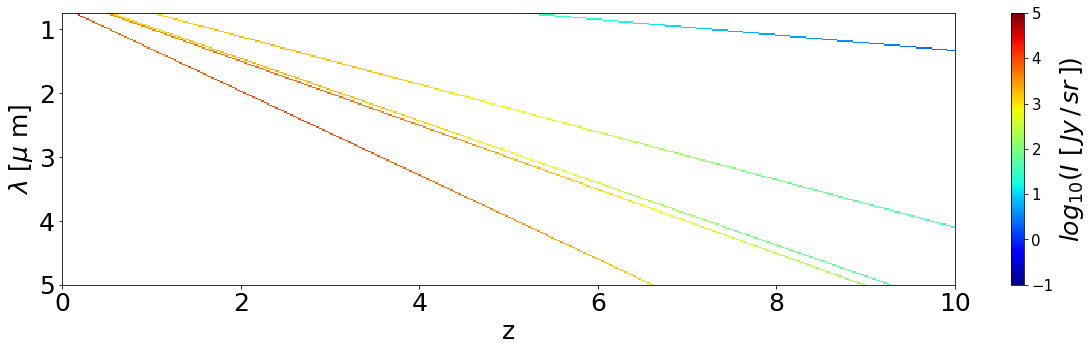

In [15]:
wlbins = np.linspace(sphx_par.wl_binedges[0],sphx_par.wl_binedges[-1],200)
wlbins = (wlbins * u.um).to(u.GHz, equivalencies = u.spectral()).value
_, _, _, _, _, _, _, I_coords_all1 = sparse_dict(dth, wlbins,\
                                      line_use, model = model, dz = 0.001)

fig = plt.figure(figsize=(20,5))
ext = [z_coords_all[0], z_coords_all[-1], sphx_par.wl_binedges[-1], sphx_par.wl_binedges[0]]
plt.imshow(np.log10(I_coords_all1), 
           extent = ext, vmin = -1, vmax = 5, cmap = "jet")
cbar = plt.colorbar()
cbar.set_label(r'$log_{10}(I\,\,[\,Jy\, /\, sr\,])$', fontsize = 25)
cbar.ax.tick_params(labelsize=15) 
plt.xlabel('z',fontsize=25)
plt.ylabel(r'$\lambda$ [$\mu$ m]',fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('plots/paperfig/A_raw.pdf', bbox_inches = 'tight', dpi = 300)

=================

### Run Sparse Dict

skip this cell

=================

In [23]:
A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all \
= sparse_dict(dth, nu_binedges, line_use, model = model)

with open('data_internal/sparse_be13_dict.pickle','wb') as pfile:
    pickle.dump([A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all],pfile)

=================

In [4]:
with open('data_internal/sparse_be13_dict.pickle','rb') as pfile:
    A, I_norm, z_coords, N_nu, N_z, z_coords_all, z_idx, I_coords_all = pickle.load(pfile)

### Plot $A$

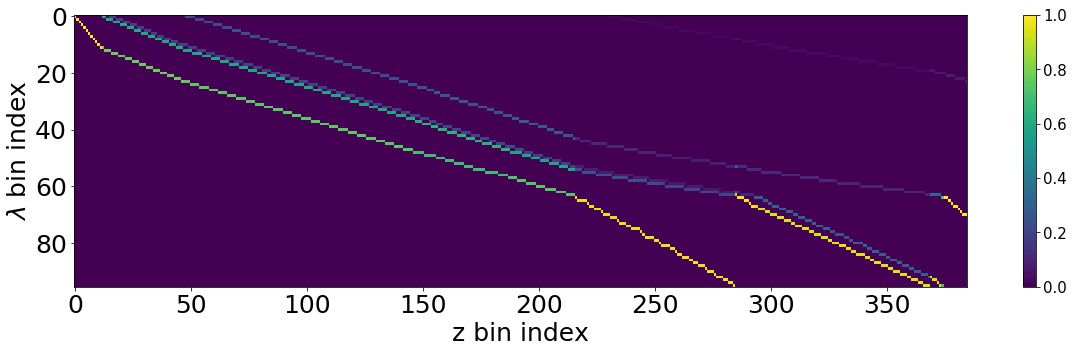

In [5]:
fig = plt.figure(figsize=(20,5))
plt.imshow(A, aspect='auto', vmin = 0, vmax = 1)
plt.xlabel('z bin index',fontsize=25)
plt.ylabel(r'$\lambda$ bin index',fontsize = 25)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15) 
plt.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('plots/paperfig/A.pdf', bbox_inches = 'tight', dpi = 300)

### Example Toy model Light Cone and MP Step by Step

source redshifts: [1.6015 2.161  5.583  5.8265 7.7975]


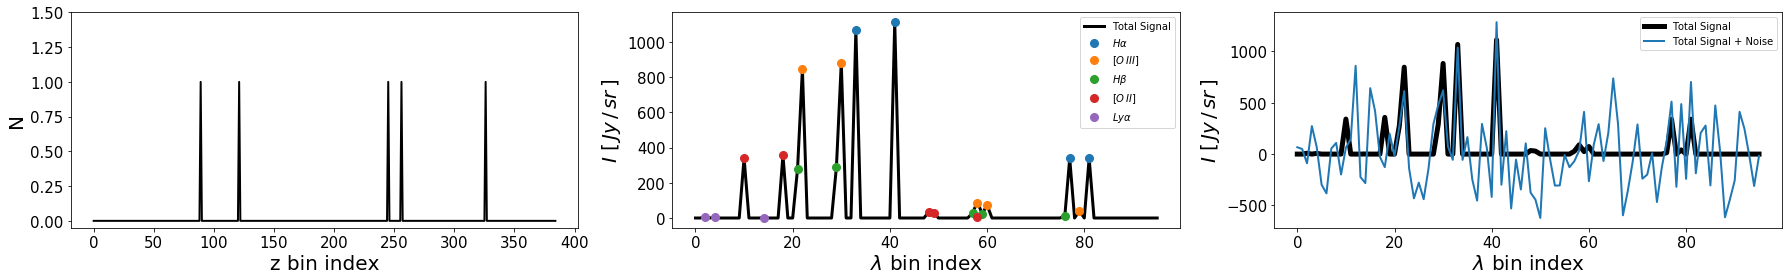

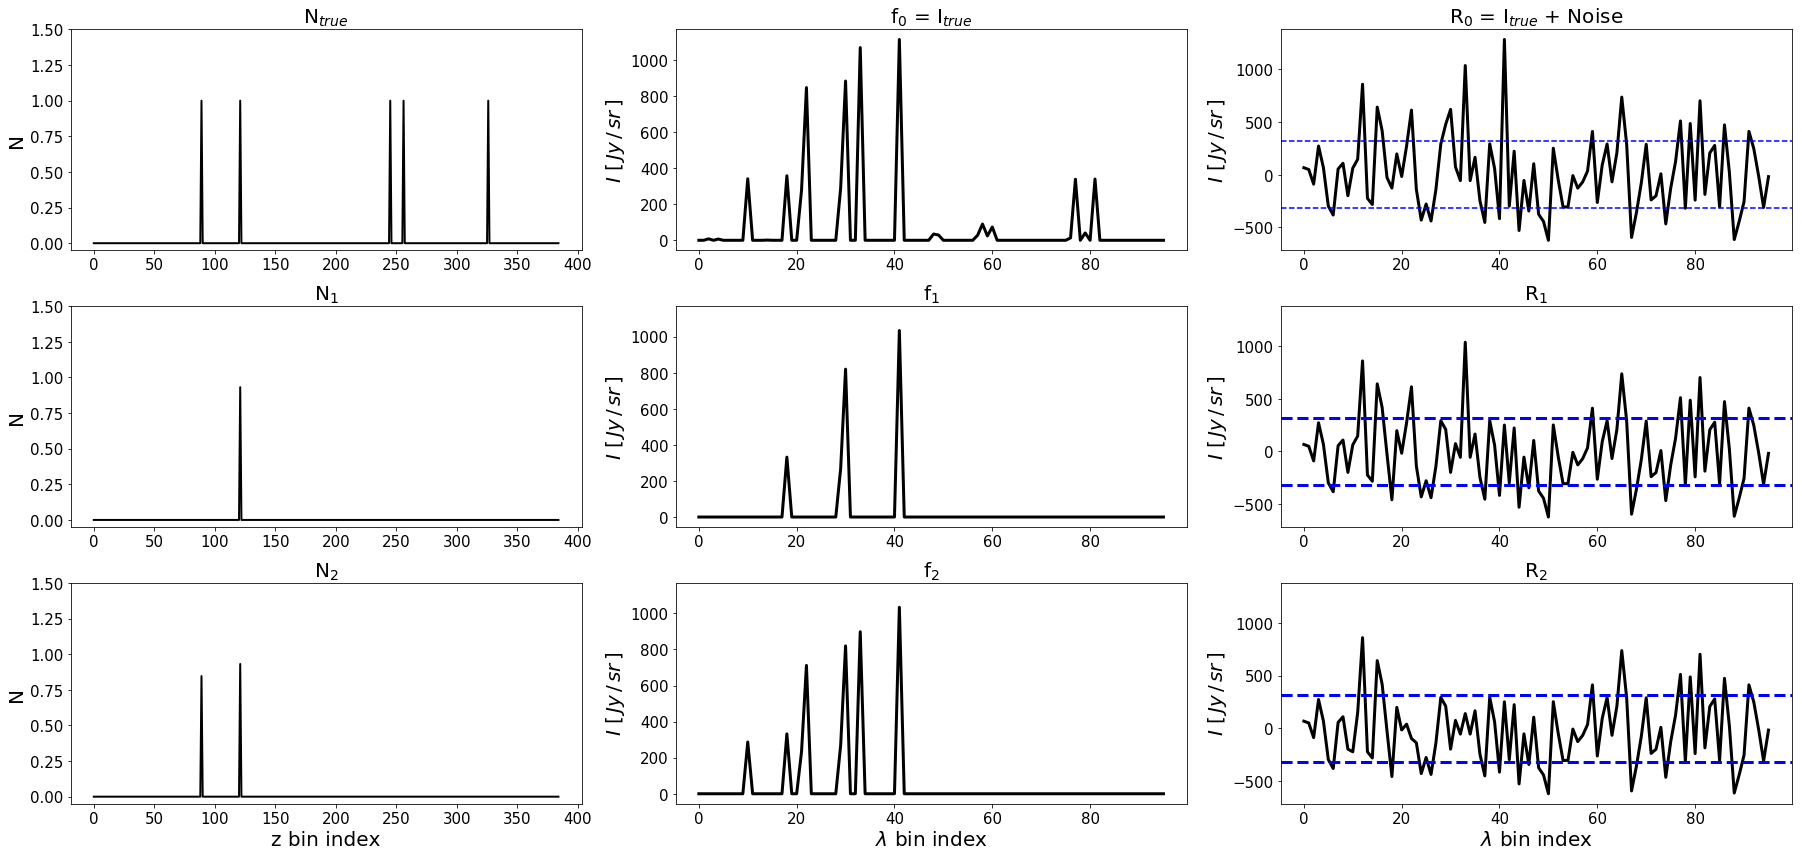

In [45]:
while True:
    N_true, Itrue_all, Itrue_targ = gen_lightcone_toy(4, dth, nu_binedges, z_coords_all, \
                          I_coords_all, z_idx, line_use, line_targ_vec, model = model)
    N_true = np.sum(N_true, axis = 0)
    Itrue_all = np.mean(Itrue_all, axis = 0)
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    Itrue_targ = np.mean(Itrue_targ, axis = 1)

    _,iter_count = run_MP_sig(A, I_norm, Iobs_all.reshape(1,-1), \
                              sigI, sig_th, iter_max = 100, return_iter = True)
    
    if iter_count == 2 and np.sum(N_true) <= 5 and np.sum(N_true) > 3:
        break

print('source redshifts:', z_coords[N_true != 0])

fig, ax = plt.subplots(1,3, figsize = (25,4))

ax[0].plot(N_true, 'k', lw = 2)
ax[0].set_xlabel('z bin index', fontsize = 20)
ax[0].set_ylabel('N', fontsize = 20)
ax[0].set_ylim([-0.05, 1.5])
ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].plot(Itrue_all, 'k-', lw = 3, label = 'Total Signal')
for i in range(len(line_use)):
    sp = np.where(Itrue_targ[i,:] != 0)[0]
    ax[1].plot(np.arange(N_nu)[sp],Itrue_targ[i,sp], 'o',label = line_name_arr[i], markersize = 8)
ax[1].legend(loc = 0)
ax[1].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=15)


ax[2].plot(Itrue_all,'k-', lw = 5, label = 'Total Signal')
ax[2].plot(Iobs_all,'-', lw = 2, label = 'Total Signal + Noise')
ax[2].legend(loc = 0)
ax[2].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[2].tick_params(axis='both', which='major', labelsize=15)

ylim0 = ax[0].get_ylim()
ylim1 = ax[1].get_ylim()
ylim2 = ax[2].get_ylim()
fig.tight_layout()
plt.savefig('plots/paperfig/toy_lc.pdf', bbox_inches = 'tight', dpi = 300)

# MP step-by-step (toy)

fig, ax = plt.subplots(3, 3, figsize = (25, 12))
ax[0][0].plot(N_true, 'k', lw = 2)
ax[0][0].set_ylabel('N', fontsize = 20)
ax[0][0].set_ylim(ylim0)
ax[0][0].tick_params(axis='both', which='major', labelsize=15)
ax[0][0].set_title('N$_{true}$', fontsize = 20)

ax[0][1].plot(Itrue_all, 'k-', lw = 3, label = 'Total Signal')
ax[0][1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[0][1].set_ylim(ylim1)
ax[0][1].tick_params(axis='both', which='major', labelsize=15)
ax[0][1].set_title(r'f$_0$ = I$_{true}$', fontsize = 20)

ax[0][2].plot(Iobs_all,'k-', lw = 3, label = 'Total Signal + Noise')
line = ax[0][2].axhline(sigI, ls = '--', c = 'b')
ax[0][2].axhline(-sigI, ls = '--', c = line.get_color())
ax[0][2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[0][2].set_ylim(ylim2)
ax[0][2].tick_params(axis='both', which='major', labelsize=15)
ax[0][2].set_title(r'R$_0$ = I$_{true}$ + Noise', fontsize = 20)

R_arr = Iobs_all.copy()
f_arr = np.zeros(N_nu)
NI_arr = np.zeros(N_z)
iter_count = 0
iter_max = 100

while True:
    if iter_count == iter_max:
        break
    iter_count += 1
    gamma = np.argmax(np.dot(R_arr.reshape(1,-1), A)[0])
    amp = np.sum(A[:,gamma] * R_arr)
    if amp < sig_th * sigI:
        break
    u_arr = amp * A[:,gamma]
    NI_arr[gamma] += amp
    R_arr -= u_arr
    f_arr += u_arr
    R = np.sqrt(np.mean(R_arr**2))
    
    
    ax[iter_count][0].plot(NI_arr / (I_norm / 4), 'k', lw = 2)
    ax[iter_count][0].set_ylim(ylim0)
    ax[iter_count][0].set_ylabel('N', fontsize = 20)
    ax[iter_count][0].tick_params(axis='both', which='major', labelsize=15)
    ax[iter_count][0].set_title('N$_{%d}$'%iter_count, fontsize = 20)
    
    ax[iter_count][1].plot(f_arr, 'k-', lw = 3, label = 'Total Signal')
    ax[iter_count][1].set_ylim(ylim1)
    ax[iter_count][1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
    ax[iter_count][1].tick_params(axis='both', which='major', labelsize=15)
    ax[iter_count][1].set_title('f$_{%d}$'%iter_count, fontsize = 20)

    ax[iter_count][2].plot(R_arr,'k-', lw = 3, label = 'Total Signal + Noise')
    ax[iter_count][2].set_ylim(ylim2)
    ax[iter_count][2].axhline(sigI, ls = '--', c = line.get_color(), lw = 3)
    ax[iter_count][2].axhline(-sigI, ls = '--', c = line.get_color(), lw = 3)
    ax[iter_count][2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
    ax[iter_count][2].tick_params(axis='both', which='major', labelsize=15)
    ax[iter_count][2].set_title('R$_{%d}$'%iter_count, fontsize = 20)

ax[2][0].set_xlabel('z bin index', fontsize = 20)
ax[2][1].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[2][2].set_xlabel('$\lambda$ bin index', fontsize = 20)

fig.tight_layout()
plt.savefig('plots/paperfig/MP_steps.pdf', bbox_inches = 'tight', dpi = 300)

### Example General model Light Cone

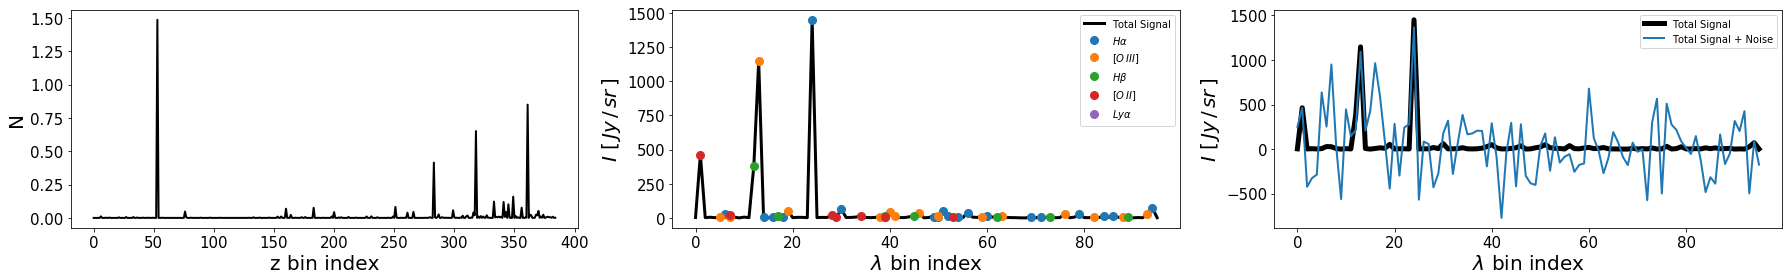

In [53]:
N_true, Itrue_all, Itrue_targ = gen_lightcone(4, dth, nu_binedges, z_coords_all, \
                      I_coords_all, z_idx, line_use, line_targ_vec, model = model)
N_true = np.sum(N_true, axis = 0)
Itrue_all = np.mean(Itrue_all, axis = 0)
Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
Itrue_targ = np.mean(Itrue_targ, axis = 1)

fig, ax = plt.subplots(1,3, figsize = (25,4))

ax[0].plot(N_true, 'k', lw = 2)
ax[0].set_xlabel('z bin index', fontsize = 20)
ax[0].set_ylabel('N', fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].plot(Itrue_all, 'k-', lw = 3, label = 'Total Signal')
for i in range(len(line_use)):
    sp = np.where(Itrue_targ[i,:] > 5)[0]
    ax[1].plot(np.arange(N_nu)[sp],Itrue_targ[i,sp], 'o',label = line_name_arr[i], markersize = 8)
ax[1].legend(loc = 0)
ax[1].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[1].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=15)


ax[2].plot(Itrue_all,'k-', lw = 5, label = 'Total Signal')
ax[2].plot(Iobs_all,'-', lw = 2, label = 'Total Signal + Noise')
ax[2].legend(loc = 0)
ax[2].set_xlabel('$\lambda$ bin index', fontsize = 20)
ax[2].set_ylabel(r'$I\,\,[\,Jy\, /\, sr\,]$', fontsize = 20)
ax[2].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.savefig('plots/paperfig/gen_lc.pdf', bbox_inches = 'tight', dpi = 300)